In [1]:
import  pandas as  pd

In [2]:
dataset = pd.read_csv('test.csv')

df = pd.DataFrame(dataset) 
df.head()

,F1,F2,F3,F4,target
0,a1,10,50,12,1
1,a2,12,110,11,1
2,a3,13,90,12,1
3,a4,86,35,7,1
4,a5,10,70,9,1


In [3]:
df.shape

(50, 5)

In [4]:
df[0:30].F2.min()

10

In [5]:
df[31: ].F2.max()

105

In [6]:
import  matplotlib.pyplot as plt

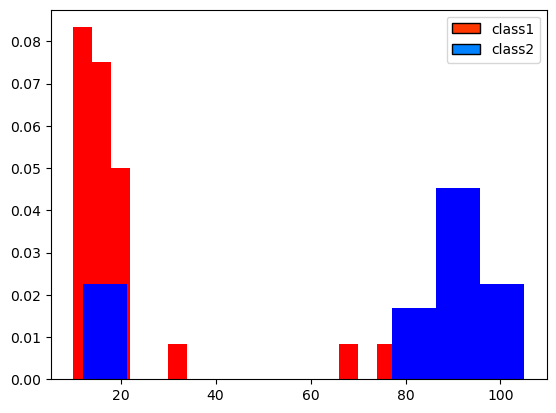

In [7]:
plt.hist(df[0:30].F2  , bins='auto'  ,color='r',density=True); 
plt.hist(df[31: ].F2 , bins='auto'  ,color='b',density=True);

from matplotlib.patches import Rectangle
cc = plt.get_cmap('jet')           #"jet" colormap, which maps numbers between 0 and 1 to RGB colors
h = [Rectangle((0,0),1,1,color=c,ec="k") for c in [cc(0.85),cc(0.25)]]

plt.legend(h , ["class1","class2"]);

In [8]:
C1   = df[0:30].F2
C2   = df[31: ].F2
data =[C1 ,C2]

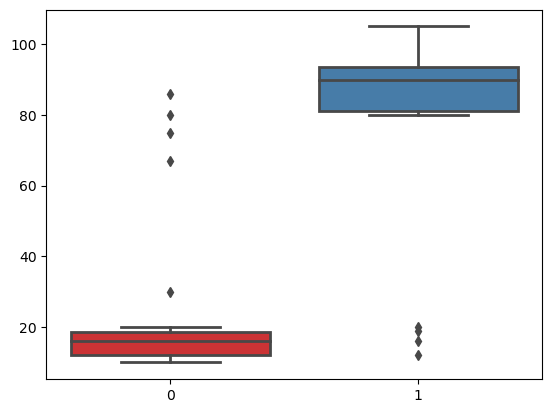

In [9]:
import seaborn as s
ax = s.boxplot(data=data , linewidth=2 , notch=False , palette="Set1" ) 

In [10]:
dfd = df.drop( ['F1'] , axis=1 )

In [11]:
X = dfd.drop( ['target'] , axis = 1 )
X.shape

(50, 3)

In [12]:
y = dfd['target'] 
y.shape

(50,)

In [13]:
from  sklearn.tree import  DecisionTreeClassifier

In [14]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
Xtrain.shape

(35, 3)

In [18]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(Xtrain)  
Xtrain = scaler.transform(Xtrain)  
Xtest  = scaler.transform(Xtest) 

In [19]:
DT.fit (Xtrain , ytrain)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
ypDT   = DT.predict(Xtest)

In [21]:
from  sklearn.metrics   import  classification_report

In [22]:
print(classification_report(ytest, ypDT , target_names=['CLASS2', 'CLASS1'] ))

              precision    recall  f1-score   support

      CLASS2       1.00      0.50      0.67         6
      CLASS1       0.75      1.00      0.86         9

    accuracy                           0.80        15
   macro avg       0.88      0.75      0.76        15
weighted avg       0.85      0.80      0.78        15



In [23]:
from  sklearn.metrics   import  confusion_matrix

In [24]:
confusion_matrix(ytest, ypDT)

array([[3, 3],
       [0, 9]], dtype=int64)

In [25]:
DT.score (Xtrain , ytrain)  

0.9714285714285714

In [26]:
DT.score (Xtest , ytest)   

0.8